# Example of plotting data from testing framework

For this example we consider the `bulk-diamond` test, which computes the energy-volume curve of a bulk diamond cell with each of the models.

Populating the interactive namespace from numpy and matplotlib


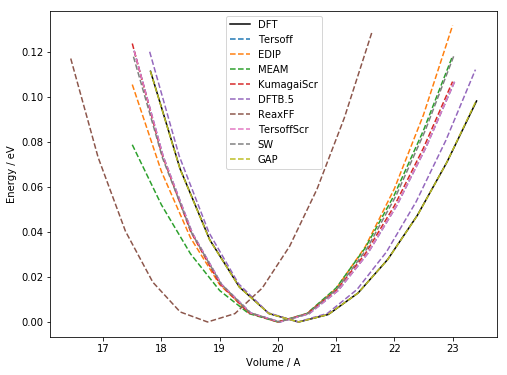

In [41]:
%pylab inline

import glob
import json
import os

ref_data = json.load(open("test-results/model-CASTEP_ASE-test-bulk_diamond-properties.json"))
ref_data = np.array(ref_data['diamond_E_vs_V'])

figsize(8, 6)
plot(ref_data[:,0], ref_data[:,1] - ref_data[:, 1].min(), 'k-', label="DFT")

for json_file in glob.glob("test-results/model-*-test-bulk_diamond-properties.json"):
    if 'CASTEP_ASE' in json_file:
        continue
    model_name = os.path.basename(json_file).split('-')[1]
    data = json.load(open(json_file))
    data = np.array(data['diamond_E_vs_V'])    
    plot(data[:, 0], data[:,1] - data[:,1].min(), '--', label=model_name)

xlabel('Volume / A')
ylabel('Energy / eV')
legend();